In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
from FANTASY import geodesic_integrator
from geodesic_metrics import (update_param, 
                              g00, g01, g02, g03, g11, g12, g13, g22, g23, g33, 
                              mag, Newtonian_orbit, 
                              get_orbital_evolution, get_orbital_velocity)
from geodesic_plotting import plot_traj, animate_trajectories

Fantasy simulation parameters

In [2]:
omega = 1
order = 4

### Constants and units

In [3]:
G = c = 1                   # Geometrized units

# G and c in SI units
c_SI = 3e8
G_SI = 6.67e-11

# Set time scale (in seconds), determines length and mass scales through dimensional analysis
T_0 = 3.14e7                # T_0 [s], 1 year is ~ pi x 10^7 seconds
L_0 = c_SI * T_0            # 3e8 * T_0 [m] ~ 0.002 * T_0 [AU]
M_0 = (c_SI**3 / G_SI) * T_0   # 4.05e35 * T_0 [kg] ~ 2e5 * T_0[solar masses]

# Relevant length and mass scales in geometric units
AU_in_natunits = 1 / (0.002 * T_0)
SOLARMASS_in_natunits = 1 / (2e5 * T_0)


### L1 Lagrange point

#### Parameters

In [7]:
a0 = AU_in_natunits * 1.0
M = SOLARMASS_in_natunits * 1.0

M1, M2 = 1*M, 1*M                          # Masses of each BH in binary
m1, m2 = M1, M2
Porb0 = (2 * np.pi / np.sqrt(M/a0**3))     # Initial orbital period
e0 = 0.0                                   # Initial eccentricity, e0=0 => circular, c0->1 => highly elliptical

num_orbits = 1
T = num_orbits * Porb0
N = 1000
dt = T / N
delta = dt
t = np.linspace(0, T, N)

q0 = [0.0,0,0,0.0]                          # Initial position of particle
p0 = [1.0,0,0.00,0.0]                       # Initial velocity of particle

# Position vectors of each black hole
rs_1, rs_2 = get_orbital_evolution(M1, M2, Porb0, e0, T, N)

# Velocity vectors of each black hole in binary
vs_1, vs_2 = get_orbital_velocity(rs_1, rs_2, T, N)

# Calculate relative position and velocity of binaries
rs_12 = (rs_1 - rs_2)
Rs_12 = np.linalg.norm(rs_12, axis=1)[:,None]
ns_12 = rs_12 / Rs_12
vs_12 = vs_1 - vs_2
Vs_12 = np.linalg.norm(vs_12, axis=1)

# Parameter values
x_0 = q0[1:]              # Initial postion of particle
r1_0 = rs_1[0,:]          # Initial position of particle at x_0 relative to BH1
r2_0 = rs_2[0,:]          # Initial position of particle at x_0 relative to BH2
r12_0 = rs_12[0,:]        # Relative positions of BHs at t = 0
v1_0 = vs_1[0,:]          # Initial velocity of particle at x_0 relative to BH1
v2_0 = vs_2[0,:]
v12_0 = vs_12[0,:]

# Spin
chi1, chi2 = -1.0, 1.0
S1, S2 = np.array([1,-1,2]), np.array([-1,-2,3])
S1, S2 = chi1 * M**2 * c_SI * 100 * S1 / mag(S1), chi2 * M**2 * c_SI * 100 * S2 / mag(S2)
S1, S2 = np.array([0,0,1]), np.array([0,0,1])
S1, S2 = np.array([0,0,0]), np.array([0,0,0])

Param = [x_0, m1, m2, r1_0, r2_0, r12_0, v1_0, v2_0, v12_0, S1, S2]

### Run simulation

In [8]:
sol = geodesic_integrator(N,delta,omega,q0,p0,Param,order,rs_1=rs_1,rs_2=rs_2,rs_12=rs_12,vs_1=vs_1,vs_2=vs_2,vs_12=vs_12,update_parameters=True)

Delta 0.0010005072145190424


 56%|█████▌    | 559/1000 [02:49<02:13,  3.31it/s]

Particle ejected
Final position: [-1.92554408e-05 -2.49904948e-05  0.00000000e+00]
Time taken: N=559 out of N=1000
This corresonds to about 0.559T_0
Ending program


### Plotting

KeyError: 'm1'

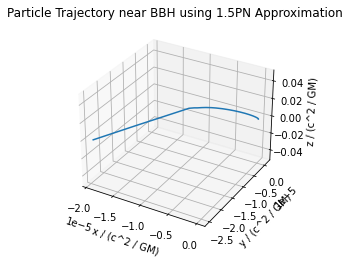

In [24]:
# Get the position and momentum of the particle in the first phase space
sol = np.array(sol[1:])

qs = sol[:,0,:]
ps = sol[:,1,:]

x, y, z = qs[:,1], qs[:,2], qs[:,3]

plot_traj(x, y, z, rs_1, rs_2)


pos = Newtonian_orbit(rs_1, rs_2, m1, m2, q0, p0, dt, N)
x_newton = pos[:,0]
y_newton = pos[:,1]
z_newton = pos[:,2]

plot_traj(x_newton, y_newton, z_newton, rs_1, rs_2)



### Animation

KeyboardInterrupt: 

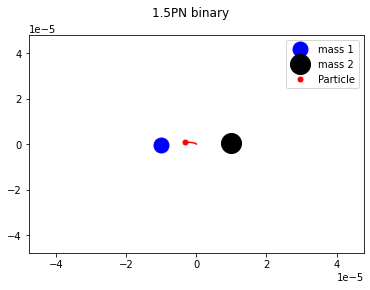

In [23]:
import os

anim_filename = "test_zjupyter"

cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
anim_path = os.path.join(parent_dir, "animations", anim_filename)

ani = animate_trajectories(x,y,z,rs_1,rs_2,a=3*a0,save_fig=anim_path)